In [1]:
library("GA")
library("tidyverse")

Loading required package: foreach
Loading required package: iterators
Package 'GA' version 3.2.1
Type 'citation("GA")' for citing this R package in publications.

Attaching package: 'GA'

The following object is masked from 'package:utils':

    de

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.1
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x purrr::accumulate() masks foreach::accumulate()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x purrr::when()       masks foreach::when()


## Define Objective function

In [2]:
obj <- function(x) {
  x1=x[1]
  x2=x[2]
  x3=x[3]
  x4=x[4]
  x5=x[5]
  x6=x[6]
  x7=x[7]
  a=(0.7858*3.3333)*x1*(x2**2)*(x3**2)
  b=(0.7854*14.9334)*x1*(x2**2)*x3
  c=(0.7854*43.0934)*x1*(x2**2)
  d=1.508*(x1*(x6**2)+x1*(x7**2))
  e=7.4777*(x6**3+x7**3)
  f=0.7854*((x4*(x6**2))+(x5*(x7**2)))
  return (a+b-c-d+e+f)
}

## Define constraints

In [3]:
c1<-function(x){
  (27/(x[1]*(x[2]**2)*x[3]))-1
}
c2<-function(x){
  (397.5/(x[1]*(x[2]**2)*(x[3]**2)))-1
}
c3<-function(x){
  ((1.93*x[4]**3)/(x[2]*x[3]*(x[6]**4)))-1
}
c4<-function(x){
  ((1.93*x[5]**3)/(x[2]*x[3]*(x[7]**4)))-1
}
c5<-function(x){
  (745**2)*(x[4]**2)/((x[2]**2)*(x[3]**2))-(110**2)*(x[6]**6)+16.9*(10**6)
}
c6<-function(x){
  (745**2)*(x[5]**2)/((x[2]**2)*(x[3]**2))-(85**2)*(x[7]**6)+157.5*(10**6)
}
c7<-function(x){
  (x[2]*x[3])-40
}
c8<-function(x){
  5*x[2]-x[1]
}
c9<-function(x){
  x[1]-12*x[2]
}
c10<-function(x){
  1.5*x[6]-x[4]+1.9
}
c11<-function(x){
  1.1*x[7]-x[5]+1.9
}

## Penalised function

In [4]:
fitness<-function(x)
{
  f<- -obj(x)
  #pen <- sqrt(.Machine$double.xmax)
  #pen<-0.00001
  pen<-50000
  cons1=max(c1(x),0)*pen
  cons2=max(c2(x),0)*pen
  cons3=max(c3(x),0)*pen
  cons4=max(c4(x),0)*pen
  cons5=max(c5(x),0)*pen
  cons6=max(c6(x),0)*pen
  cons7=max(c7(x),0)*pen
  cons8=max(c8(x),0)*pen
  cons9=max(c9(x),0)*pen
  cons10=max(c10(x),0)*pen
  cons11=max(c11(x),0)*pen
  f-cons1-cons2-cons3-cons4-cons5-cons6-cons7-cons8-cons9-cons10-cons11
}

-- Differential Evolution -------------- 

DE settings: 
Type                  =  real-valued 
Population size       =  70 
Number of generations =  100 
Elitism               =  2 
Stepsize              =  0.8 
Crossover probability =  0.5 
Mutation probability  =  0 
Search domain = 
       x1  x2 x3  x4  x5  x6  x7
lower 2.6 0.7 17 7.3 7.3 2.9 5.0
upper 3.6 0.8 28 8.3 8.3 3.9 5.5

DE results: 
Iterations             = 100 
Fitness function value = -2996.037 
Solution = 
           x1        x2       x3       x4       x5       x6       x7
[1,] 3.500434 0.7000473 17.00021 7.300392 7.723137 3.351306 5.286705

iter,x.x1,x.x2,x.x3,x.x4,x.x5,x.x6,x.x7,minf.x.
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,3.500434,0.7000473,17.00021,7.300392,7.723137,3.351306,5.286705,2996.037


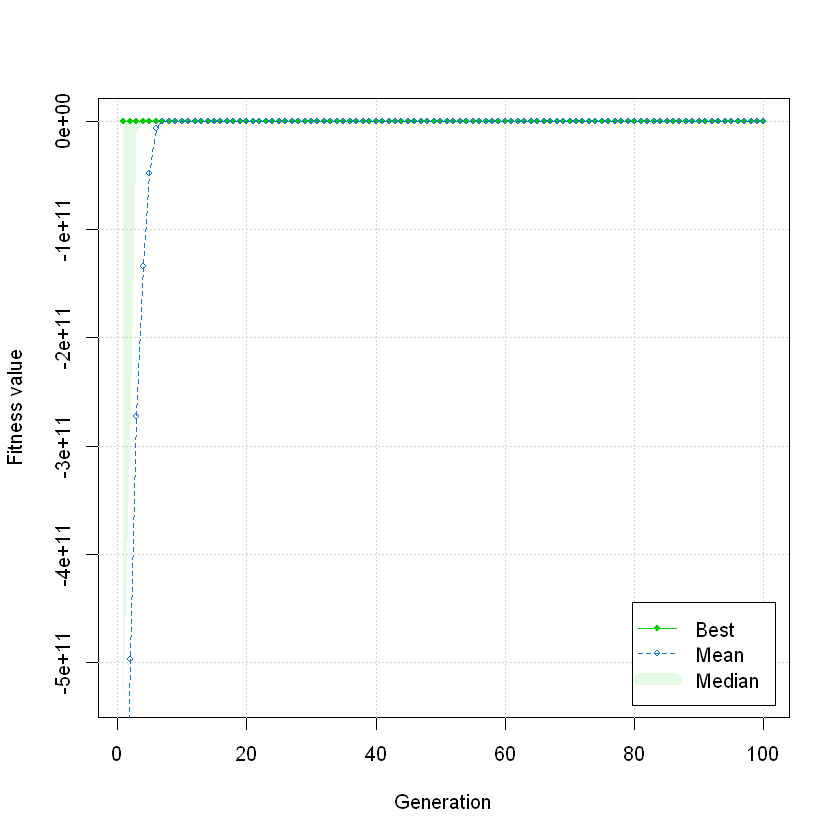

In [5]:
#part 1: One run GA in R with graph
ga_res1 <- de(type = "real-valued", fitness = fitness, 
              lower = c(2.6, 0.7, 17, 7.3, 7.3, 2.9, 5.0), 
              upper = c(3.6, 0.8, 28, 8.3, 8.3, 3.9, 5.5),
              elitism = 2,keepBest=TRUE)

summary(ga_res1)
plot(ga_res1)

GAsum<- data.frame("iter"=ga_res1@iter,"x"=ga_res1@solution, "minf(x)"=-ga_res1@fitnessValue)
GAsum


iter,x1,x2,x3,x4,x5,x6,x7,minf(x),CPU(time)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,3.500576,0.7000023,17.00087,7.304077,7.718914,3.351334,5.286764,2995.989,0.4408581
100,3.500592,0.7000324,17.00057,7.308093,7.728271,3.350534,5.286913,2996.211,0.4611440
100,3.500792,0.7000220,17.00007,7.300913,7.718966,3.350546,5.286900,2995.884,0.6472690
100,3.500493,0.7000248,17.00030,7.312648,7.716657,3.350843,5.287033,2996.031,0.7619300
100,3.500570,0.7000253,17.00067,7.322766,7.717631,3.352413,5.287091,2996.675,0.8188081
100,3.501184,0.7000567,17.00208,7.312705,7.719336,3.350636,5.287126,2996.820,0.5694768
100,3.500247,0.7000325,17.00109,7.309849,7.720684,3.350474,5.286754,2995.898,0.4936800
100,3.500624,0.7000166,17.00110,7.305740,7.722146,3.350861,5.287322,2996.432,0.4817121
100,3.500417,0.7000095,17.00029,7.318892,7.723360,3.350349,5.286716,2995.806,0.4677808


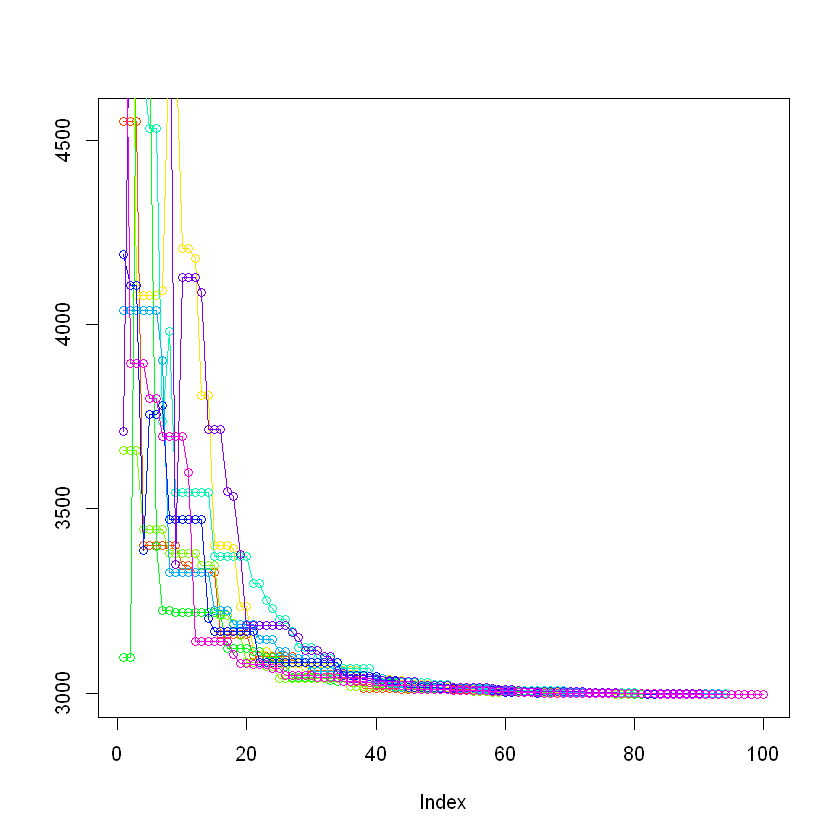

In [8]:
#part 2: 10 run table
df <- data.frame(matrix(ncol = 5, nrow = 0))
x1 <- c("iter", "x1","x2","x3","x4","x5","x6","x7","minf(x)","CPU(time)")
val=list()
for (i in 1:10){
  start_time <- Sys.time()
  ga_res <- de(type = "real-valued", fitness = fitness, 
                lower = c(2.6, 0.7, 17, 7.3, 7.3, 2.9, 5.0), 
                upper = c(3.6, 0.8, 28, 8.3, 8.3, 3.9, 5.5),
                elitism = 2,keepBest=TRUE)
  end_time <- Sys.time()
  tdif <- end_time - start_time
  df=rbind(df,c(ga_res@iter,ga_res@solution,-ga_res@fitnessValue,tdif))
  vec<-vector()
  for (j in 1:100){
    vec[j]=obj(ga_res@bestSol[[j]])
  }
  val[[i]]=vec
}
colnames(df) <- x1
name=c(1:10)
valdf <- as.data.frame(val)
colnames(valdf)<-name
df
colors<-rainbow(20)
plot(valdf[,1],type = "o",col=colors[1],ylab='')
for(i in 1:9){
  lines(valdf[,i], type = "o", col =colors[2*i])
}

